In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import SetHisto
from Plot_func import SetGlobalStyle
from Plot_func import SetCanvas
from Plot_func import SetLegend
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx03y03"
subfix2 = "_aliceseed_elossnocorr_MSnocorr_Helix"
subfix3 = "_r03_03"
subfix4 = "_p_0.1_4"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      

In [3]:
hpRes = ROOT.TH1D( 'hpres', 'hpRes', 21, -0.4, 0.4 )
hpResKend = ROOT.TH1D( 'hpres', 'hpRes', 21, -0.4, 0.4 )

htanlambdaRes = ROOT.TH1D( 'htanlambdaRes', 'htanlambdaRes', 31, -0.03, 0.03 )
htanlambdaResKend = ROOT.TH1D( 'htanlambdaResKend', 'htanlambdaResKend', 31, -0.03, 0.03 )

hsinPhiRes = ROOT.TH1D( 'hsinPhiRes', 'hsinPhiRes', 21, -0.06, 0.06 )
hsinPhiResKend = ROOT.TH1D( 'hsinPhiResKend', 'hsinPhiResKend', 21, -0.06, 0.06 )

hNPoints = ROOT.TH1D( 'NPoints', 'hNPoints', 20, 0, 20 )
hLength = ROOT.TH1D( 'Length', 'Length', 21, 0, 800 )
hNPlanes = ROOT.TH1D( 'NPlanes', 'NPlanes', 7, 0, 7 )
hp = ROOT.TH1D( 'Momentum', 'Momentum', 21, 0, 5 )


Warning in <TFile::Append>: Replacing existing TH1: hpres (Potential memory leak).


In [4]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_plane.at(0).Y()
        xMC = t.xyz_plane.at(0).X()
        sinphiMC = t.sinphi_plane.at(0)   
        tanlambdaMC = t.tanlambda_plane.at(0)
        invpTMC = t.invpT_plane.at(0)
        pMC = np.abs((1/np.cos(np.arctan(t.tanlambda_plane.at(0))))/t.invpT_plane.at(0))

        size_MC = t.xyz_plane.size()-1
        yMCend = t.xyz_plane.at(size_MC).Y()
        xMCend = t.xyz_plane.at(size_MC).X()
        sinphiMCend = t.sinphi_plane.at(size_MC)   
        tanlambdaMCend = t.tanlambda_plane.at(size_MC)
        invpTMCend = t.invpT_plane.at(size_MC)
        pEndMC = np.abs((1/np.cos(np.arctan(t.tanlambda_plane.at(size_MC))))/t.invpT_plane.at(size_MC))
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = -t.curvature_seed/(0.5*0.00299792458)
        pSeed =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t.curvature_seed)

        ySeedend = t.xyz_seed_bkw.Y()
        xSeedend = t.xyz_seed_bkw.X()
        sinphiSeedend= t.sinphi_seed_bkw
        tanlambdaSeedend=t.tanlambda_seed_bkw
        invpTSeedend = -t.curvature_seed_bkw/(0.5*0.00299792458)
        pSeedEnd =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeedend)))*(0.5*0.299792458e-2)/t.curvature_seed_bkw)

        last_n = t.parvect_bkw.size()-1
        y = t.parvect_bkw[last_n][0]
        x = t.parvect_bkw[last_n][1]
        sinphi= t.parvect_bkw[last_n][2]
        tanlambda=t.parvect_bkw[last_n][3]
        invpT = t.parvect_bkw[last_n][4]
        p = np.abs((1/np.cos(np.arctan(t.parvect_bkw[last_n][3])))/t.parvect_bkw[last_n][4])

        last_n_end = t.parvect.size()-1
        yend = t.parvect[last_n_end][0]
        xend = t.parvect[last_n_end][1]
        sinphiend= t.parvect[last_n_end][2]
        tanlambdaend=t.parvect[last_n_end][3]
        invpTend = t.parvect[last_n_end][4]
        pEnd = np.abs((1/np.cos(np.arctan(t.parvect[last_n_end][3])))/t.parvect[last_n_end][4])

        htanlambdaRes.Fill(tanlambdaSeed-tanlambdaMC)
        htanlambdaResKend.Fill(tanlambdaend-tanlambdaMCend)

        hsinPhiRes.Fill(sinphiSeed-sinphiMC)
        hsinPhiResKend.Fill(sinphiend-sinphiMCend)

        hpRes.Fill((pSeed-pMC)/pMC)
        hpResKend.Fill((pEnd-pEndMC)/pEndMC)


        hNPoints.Fill(last_n +1)
        Length = 0
        for n in range(1,t.xyz_plane.size()):
            Length+=np.sqrt( np.square(t.xyz_plane[n].X()-t.xyz_plane[n-1].X())+np.square(t.xyz_plane[n].Y()-t.xyz_plane[n-1].Y())+np.square(t.xyz_plane[n].Z()-t.xyz_plane[n-1].Z()))
        hLength.Fill(Length)
        hp.Fill(pMC)
        hNPlanes.Fill(t.nHits_perPlane.size())
        

In [5]:
hpRes.Scale(1/hpRes.GetEntries())
hpResKend.Scale(1/hpResKend.GetEntries())

htanlambdaRes.Scale(1/htanlambdaRes.GetEntries())
htanlambdaResKend.Scale(1/ htanlambdaResKend.GetEntries())

hsinPhiRes.Scale(1/hsinPhiRes.GetEntries())
hsinPhiResKend.Scale(1/ hsinPhiResKend.GetEntries())

### p Residuals

In [6]:
gStyle.SetOptStat(0)
SetGlobalStyle()

width = hpRes.GetBinWidth(0)
range = hpRes.GetXaxis().GetXmax()-hpRes.GetXaxis().GetXmin()
Formula = str(width)+"*(1/"+str(range)+")*(1/sqrt(2*TMath::Pi()))*([0]/[2]*exp(-0.5*((x-[1])/[2])^2)+[3]/[5]*exp(-0.5*((x-[4])/[5])^2))"
double_gauss = ROOT.TF1("double_gauss",Formula,-4,4)
double_gauss.SetParameters(0.1,hpRes.GetMean(),hpRes.GetRMS(),0.1,hpRes.GetRMS(),hpRes.GetRMS()*2)
double_gauss.SetParNames("A_{core}","#mu_{core}","#sigma_{core}","A_{tail}","#mu_{tail}","#sigma_{tail}")
double_gauss.SetParLimits(0,0.1,1)
double_gauss.SetParLimits(2,0.002,0.09)
double_gauss.SetParLimits(3,0,1)
double_gauss.SetParLimits(4,-0.1,0.1)
double_gauss.SetLineWidth(4)

 FCN=24.4737 FROM MIGRAD    STATUS=CONVERGED     257 CALLS         258 TOTAL
                     EDM=1.01157e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     5.17633e-01   2.86323e-02   2.82934e-05   2.43689e-03
   2  #mu_{core}  -3.05294e-02   1.48501e-03   1.13361e-07  -9.10265e-02
   3  #sigma_{core}   5.43136e-02   2.13487e-03   2.10057e-05  -1.29732e-06
   4  A_{tail}     2.71030e-01   2.76383e-02   6.21453e-06   4.94849e-03
   5  #mu_{tail}   2.07704e-02   6.23928e-03  -5.03042e-06   8.57275e-04
   6  #sigma_{tail}   1.30972e-01   5.34312e-03  -5.38441e-07   2.02159e-02


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/pRes_doublegauss.eps has been created


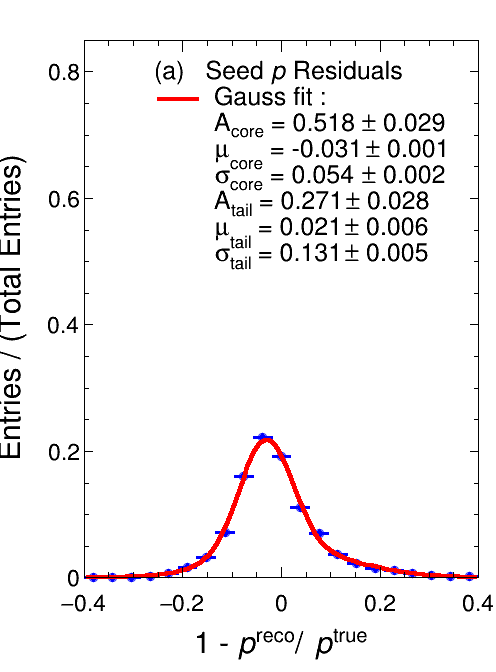

In [7]:


SetHisto(hpRes,";1 - #it{p}^{reco}/ #it{p}^{true};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.85])
hpRes.GetXaxis().SetTitleSize(0.065)
hpRes.GetXaxis().SetTitleOffset(0.95)
hpRes.GetYaxis().SetTitleSize(0.065)
hpRes.GetYaxis().SetTitleOffset(1.4)
hpRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed #it{p} Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
hpRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"pRes_doublegauss"+".eps"
ch4.Print(save)

 FCN=19.9739 FROM MIGRAD    STATUS=CONVERGED     236 CALLS         237 TOTAL
                     EDM=4.18752e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     6.29553e-01   2.79396e-02  -1.03656e-04  -7.59594e-03
   2  #mu_{core}   5.74631e-03   6.59501e-04  -7.80841e-07  -4.70076e-02
   3  #sigma_{core}   2.98732e-02   9.16603e-04  -2.98017e-05  -2.17854e-03
   4  A_{tail}     1.64397e-01   2.63037e-02   2.07778e-04  -7.24240e-03
   5  #mu_{tail}   1.69466e-02   3.12711e-03  -2.03217e-05   8.81728e-03
   6  #sigma_{tail}   7.17644e-02   4.62904e-03  -1.45249e-05  -5.53027e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/pResKF_doublegauss.eps has been created


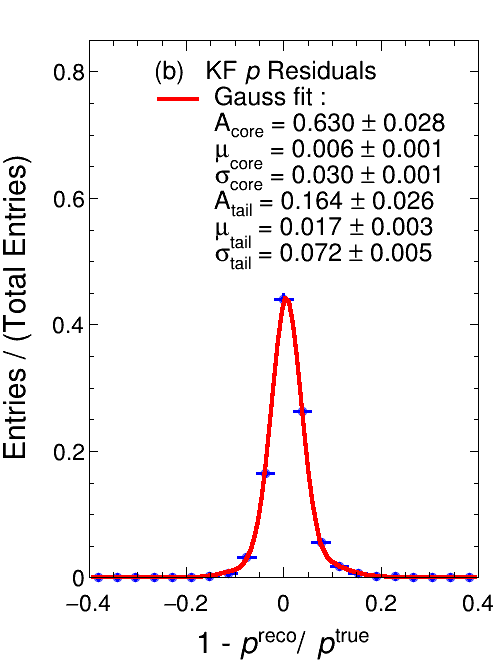

In [8]:
double_gauss.SetParameters(0.1,hpResKend.GetMean(),hpResKend.GetRMS(),0.1,hpResKend.GetRMS(),hpResKend.GetRMS()*2)

SetHisto(hpResKend,";1 - #it{p}^{reco}/ #it{p}^{true};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.85])
hpResKend.GetXaxis().SetTitleSize(0.065)
hpResKend.GetXaxis().SetTitleOffset(0.95)
hpResKend.GetYaxis().SetTitleSize(0.065)
hpResKend.GetYaxis().SetTitleOffset(1.4)
hpResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(b)   KF #it{p} Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
ch4.SetLeftMargin(0.18)
hpResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"pResKF_doublegauss"+".eps"
ch4.Print(save)

### tanlambda

 FCN=209.919 FROM MIGRAD    STATUS=CONVERGED     451 CALLS         452 TOTAL
                     EDM=1.9008e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.38411e-02   7.08267e-04  -5.21327e-07  -4.18934e-02
   2  #mu_{core}  -7.50413e-05   7.42524e-05  -2.86534e-09  -1.84972e+00
   3  #sigma_{core}   4.57989e-03   9.31027e-05   1.56471e-06   3.64650e-02
   4  A_{tail}     3.90925e-02   1.61258e-04   6.28887e-08  -9.47140e-03
   5  #mu_{tail}   9.39783e-04   1.11654e-05   7.89201e-09   2.74405e-01
   6  #sigma_{tail}   3.62567e-04   6.65770e-06   8.31571e-09  -3.18334e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/tanlambdaRes_doublegauss.eps has been created


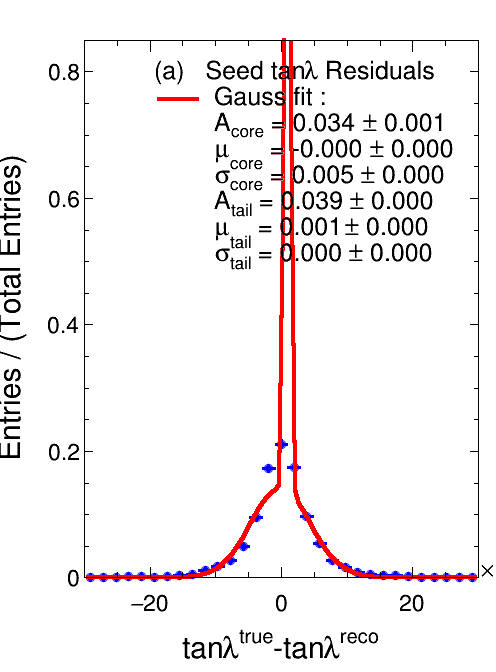

In [9]:
double_gauss.SetParameters(0.1,htanlambdaRes.GetMean(),htanlambdaRes.GetRMS(),0.1,htanlambdaRes.GetRMS(),htanlambdaRes.GetRMS()*2)
double_gauss.SetParLimits(0,0,1)
SetHisto(htanlambdaRes,";tan#lambda^{true}-tan#lambda^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.85])
htanlambdaRes.GetXaxis().SetTitleSize(0.065)
htanlambdaRes.GetXaxis().SetTitleOffset(0.95)
htanlambdaRes.GetYaxis().SetTitleSize(0.065)
htanlambdaRes.GetYaxis().SetTitleOffset(1.4)
htanlambdaRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed tan#lambda Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
htanlambdaRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"tanlambdaRes_doublegauss"+".eps"
ch4.Print(save)

 FCN=132.007 FROM MIGRAD    STATUS=CONVERGED     228 CALLS         229 TOTAL
                     EDM=4.25883e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     3.06479e-02   1.08531e-03   4.36905e-05  -3.37595e-02
   2  #mu_{core}  -1.34038e-04   4.90102e-05   2.55032e-08   5.14881e-01
   3  #sigma_{core}   2.36490e-03   5.73792e-05  -9.21192e-05  -2.70386e-02
   4  A_{tail}     2.78198e-02   2.27724e-03  -9.75075e-05   2.29237e-02
   5  #mu_{tail}   8.28226e-04   1.63329e-05  -1.25157e-07  -2.88787e+00
   6  #sigma_{tail}   4.18159e-04   9.25663e-06  -2.44859e-08   1.99615e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/tanlambdaResKF_doublegauss.eps has been created


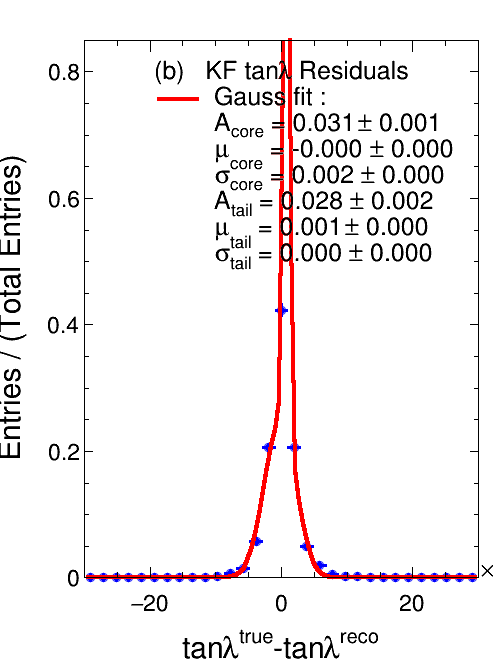

In [10]:
SetHisto(htanlambdaResKend,";tan#lambda^{true}-tan#lambda^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,0.85])
htanlambdaResKend.GetXaxis().SetTitleSize(0.065)
htanlambdaResKend.GetXaxis().SetTitleOffset(0.95)
htanlambdaResKend.GetYaxis().SetTitleSize(0.065)
htanlambdaResKend.GetYaxis().SetTitleOffset(1.4)
htanlambdaResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(b)   KF tan#lambda Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
htanlambdaResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"tanlambdaResKF_doublegauss"+".eps"
ch4.Print(save)

### SinPhi

 FCN=71.5294 FROM MIGRAD    STATUS=CONVERGED     375 CALLS         376 TOTAL
                     EDM=2.80557e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     1.17923e-01   1.80091e-03   2.32206e-05  -6.92721e-04
   2  #mu_{core}   2.83200e-04   1.68628e-04   7.01134e-07  -3.16391e-01
   3  #sigma_{core}   1.10396e-02   1.50806e-04   2.34705e-05  -4.93655e-03
   4  A_{tail}     1.42997e-13   2.96715e-04   1.43311e-04** at limit **
   5  #mu_{tail}  -4.94813e-02   1.22036e-01   5.00000e-01   1.17240e-11
   6  #sigma_{tail}  -3.89313e-01   1.41421e+00   4.29810e+00  -3.21191e-10


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/sinPhiRes_doublegauss.eps has been created


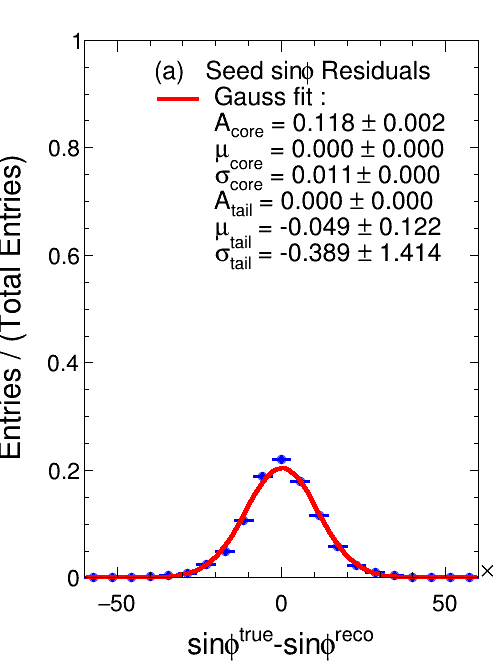

In [11]:
double_gauss.SetParameters(0.1,hsinPhiRes.GetMean(),hsinPhiRes.GetRMS(),0.1,hsinPhiRes.GetRMS(),hsinPhiRes.GetRMS()*2)
SetHisto(hsinPhiRes,";sin#phi^{true}-sin#phi^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,1])
hsinPhiRes.GetXaxis().SetTitleSize(0.065)
hsinPhiRes.GetXaxis().SetTitleOffset(0.95)
hsinPhiRes.GetYaxis().SetTitleSize(0.065)
hsinPhiRes.GetYaxis().SetTitleOffset(1.4)
hsinPhiRes.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(a)   Seed sin#phi Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
hsinPhiRes.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"sinPhiRes_doublegauss"+".eps"
ch4.Print(save)

 FCN=14.2101 FROM MIGRAD    STATUS=CONVERGED     370 CALLS         371 TOTAL
                     EDM=5.65755e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     1.02037e-01   4.13879e-03   3.09087e-06  -3.96531e-02
   2  #mu_{core}   2.49247e-05   7.81477e-05  -2.60985e-07  -3.02465e+00
   3  #sigma_{core}   3.94316e-03   1.00198e-04  -4.76654e-06  -5.48603e-02
   4  A_{tail}     1.75551e-02   3.81565e-03   3.77721e-05  -2.51172e-02
   5  #mu_{tail}   3.99287e-04   4.45564e-04  -1.17653e-06  -1.47870e-02
   6  #sigma_{tail}   8.81651e-03   6.92847e-04  -3.64779e-07  -1.67592e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h4
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/sinPhiResKF_doublegauss.eps has been created


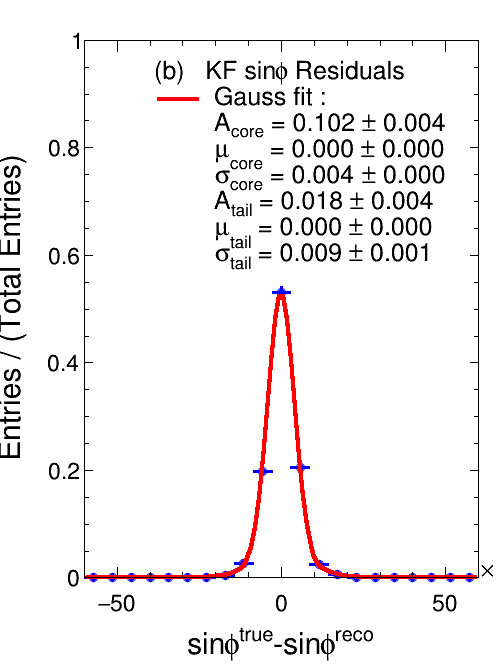

In [12]:
double_gauss.SetParameters(0.1,hsinPhiResKend.GetMean(),hsinPhiResKend.GetRMS(),0.1,hsinPhiResKend.GetRMS(),hsinPhiResKend.GetRMS()*2)
SetHisto(hsinPhiResKend,";sin#phi^{true}-sin#phi^{reco};Entries / (Total Entries)",ROOT.kBlue,20,[0,1])
hsinPhiResKend.GetXaxis().SetTitleSize(0.065)
hsinPhiResKend.GetXaxis().SetTitleOffset(0.95)
hsinPhiResKend.GetYaxis().SetTitleSize(0.065)
hsinPhiResKend.GetYaxis().SetTitleOffset(1.4)
hsinPhiResKend.Fit("double_gauss")
legend4 = ROOT.TLegend(0.3,0.6,0.96,0.91)
SetLegend(legend4)
legend4.SetTextSize(0.05*0.68*1.6)
legend4.SetHeader("(b)   KF sin#phi Residuals ")
legend4.AddEntry(double_gauss," Gauss fit :","l")
legend4.AddEntry(0," A_{core} = "+"%0.3f"%double_gauss.GetParameter(0)+" #pm ""%0.3f"% double_gauss.GetParError(0),"")
legend4.AddEntry(0," #mu_{core} = "+"%0.3f"%double_gauss.GetParameter(1)+" #pm ""%0.3f"% double_gauss.GetParError(1),"")
legend4.AddEntry(0," #sigma_{core} = "+"%0.3f"%double_gauss.GetParameter(2)+" #pm ""%0.3f"% double_gauss.GetParError(2),"")
legend4.AddEntry(0," A_{tail} = "+"%0.3f"%double_gauss.GetParameter(3)+" #pm ""%0.3f"% double_gauss.GetParError(3),"")
legend4.AddEntry(0," #mu_{tail} = "+"%0.3f"%double_gauss.GetParameter(4)+" #pm ""%0.3f"% double_gauss.GetParError(4),"")
legend4.AddEntry(0," #sigma_{tail} = "+"%0.3f"%double_gauss.GetParameter(5)+" #pm ""%0.3f"% double_gauss.GetParError(5),"")
ch4 = ROOT.TCanvas("h4","h4",500,700)
SetCanvas(ch4)
hsinPhiResKend.Draw("E0")
legend4.Draw()
ch4.Draw()
save=folder+"sinPhiResKF_doublegauss"+".eps"
ch4.Print(save)

### Properties

Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/pAllTall.eps has been created


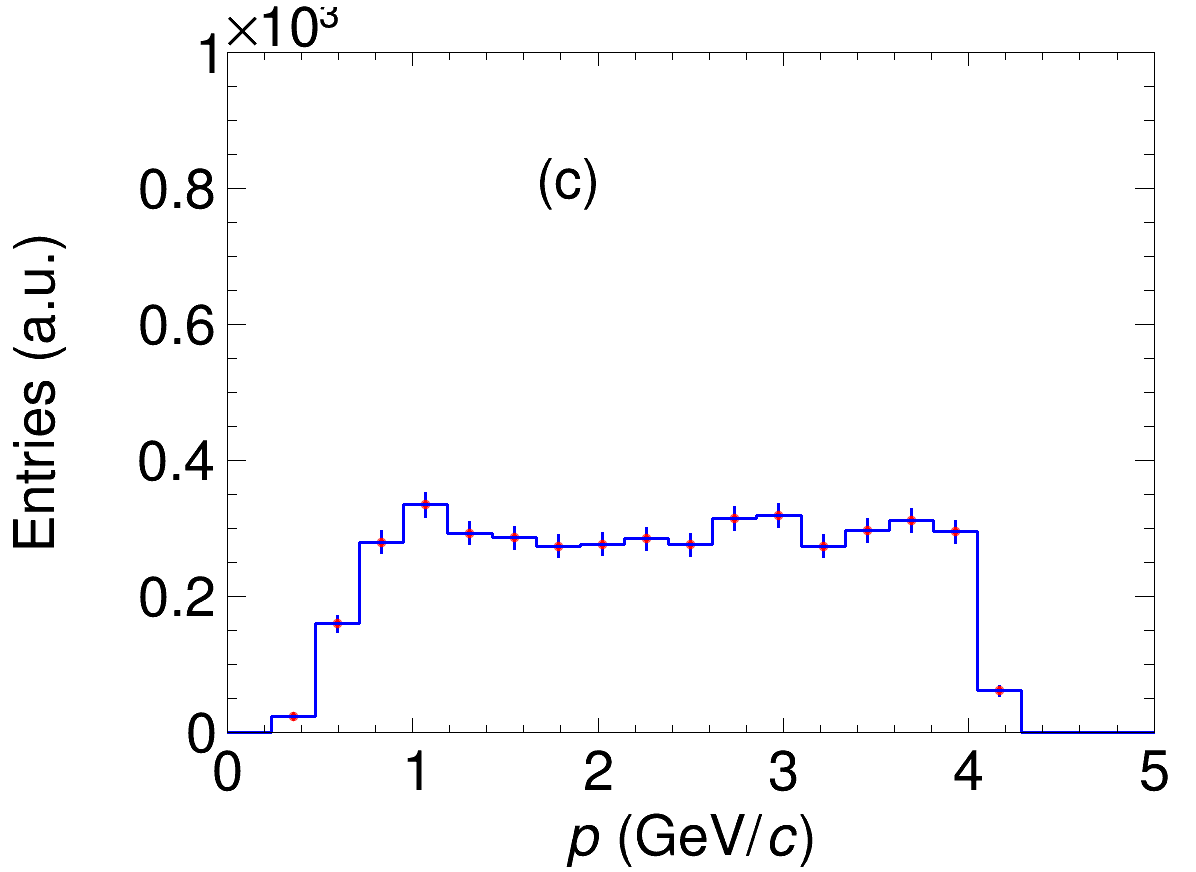

In [13]:
hq1 = ROOT.TCanvas("hq1","hq1",1200,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
SetHisto(hp,";#it{p} (GeV/#it{c});Entries (a.u.)",ROOT.kRed,20,[0,200*5])
hp.SetLineColor(ROOT.kBlue)
hp.GetXaxis().SetTitleSize(0.07)
hp.GetXaxis().SetTitleOffset(1.1)
hp.GetYaxis().SetTitleSize(0.07)
hp.GetYaxis().SetTitleOffset(1.4)
hp.GetXaxis().SetLabelSize(0.07)
hp.GetYaxis().SetLabelSize(0.07)
hp.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(c)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"pAllTall.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/NPointsAllTall.eps has been created


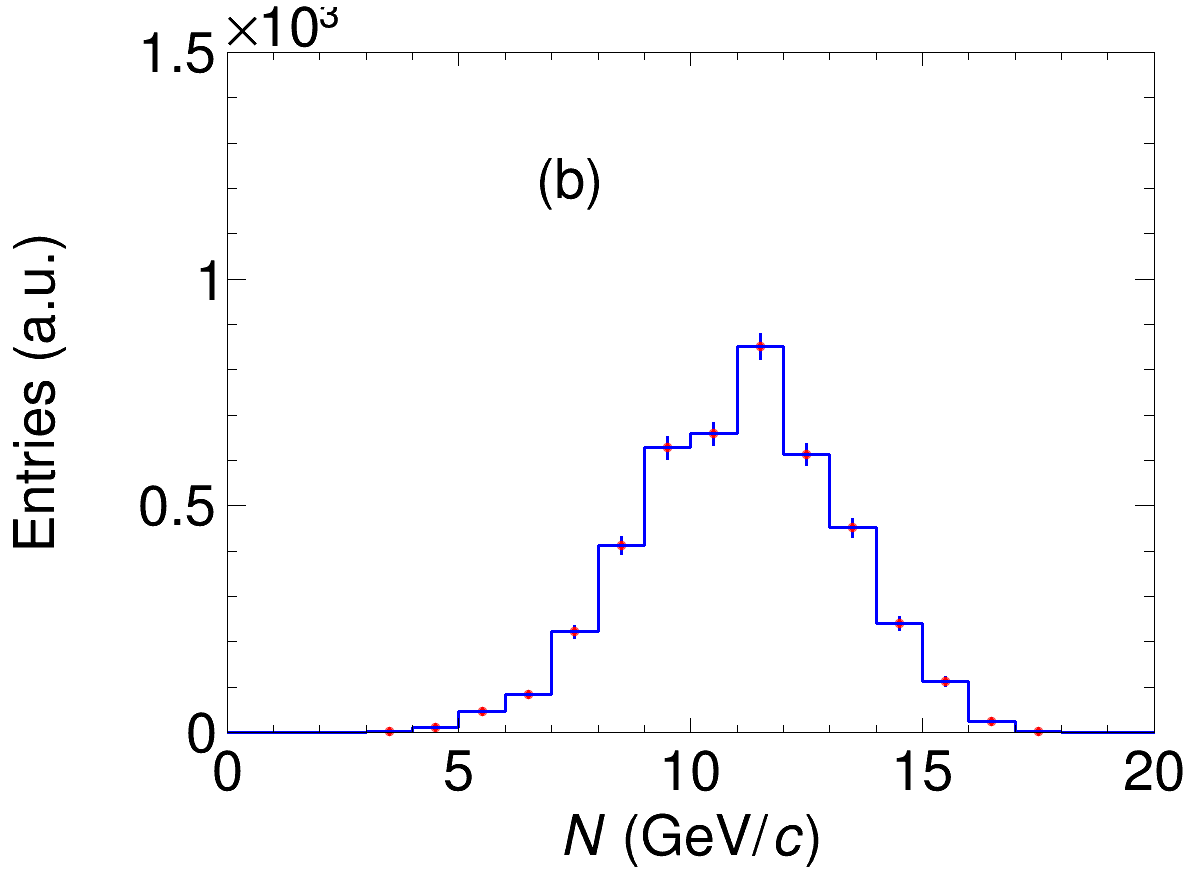

In [14]:
hq1 = ROOT.TCanvas("hq1","hq1",1200,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
SetHisto(hNPoints,";#it{N} (GeV/#it{c});Entries (a.u.)",ROOT.kRed,20,[0,300*5])
hNPoints.SetLineColor(ROOT.kBlue)
hNPoints.GetXaxis().SetTitleSize(0.07)
hNPoints.GetXaxis().SetTitleOffset(1.1)
hNPoints.GetYaxis().SetTitleSize(0.07)
hNPoints.GetYaxis().SetTitleOffset(1.4)
hNPoints.GetXaxis().SetLabelSize(0.07)
hNPoints.GetYaxis().SetLabelSize(0.07)
hNPoints.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(b)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"NPointsAllTall.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/LengthAllTall.eps has been created


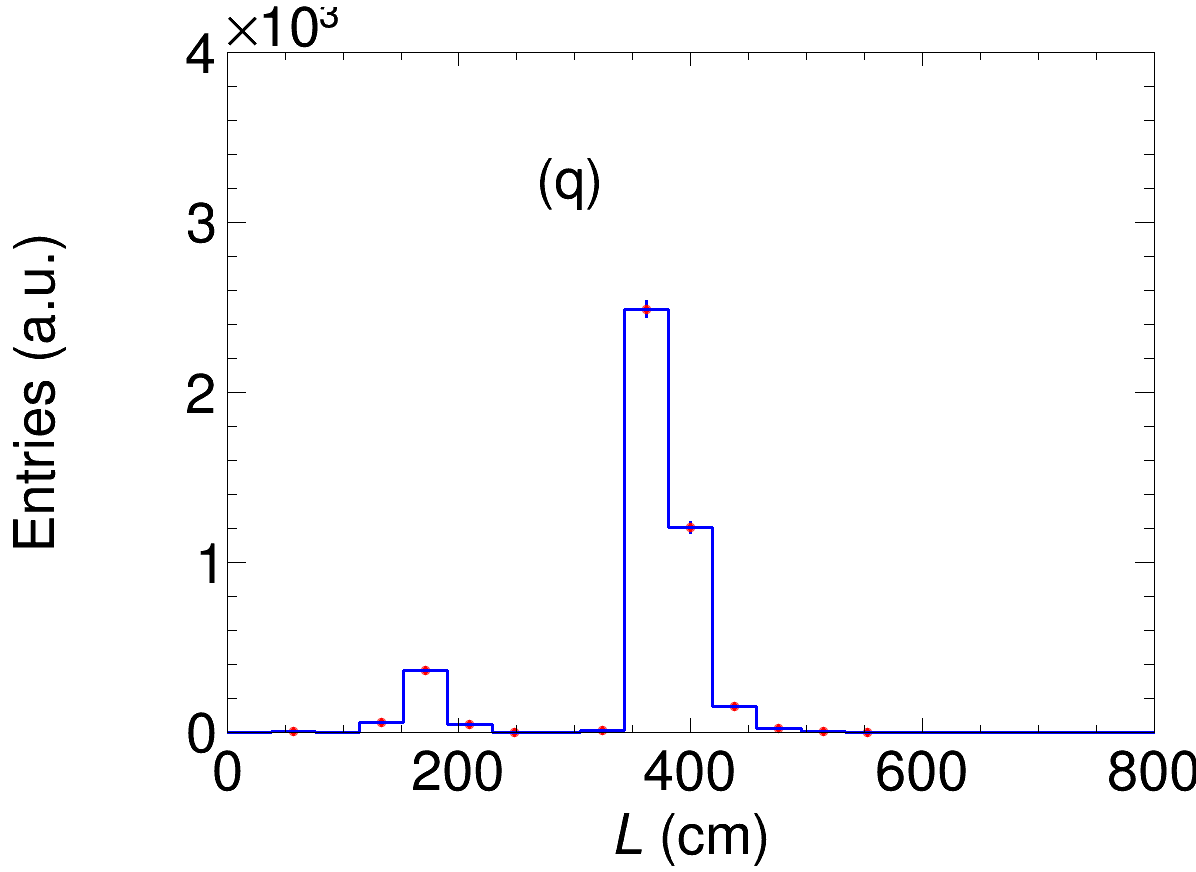

In [15]:
hq1 = ROOT.TCanvas("hq1","hq1",1200,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
SetHisto(hLength,";#it{L} (cm);Entries (a.u.)",ROOT.kRed,20,[0,800*5])
hLength.SetLineColor(ROOT.kBlue)
hLength.GetXaxis().SetTitleSize(0.07)
hLength.GetXaxis().SetTitleOffset(1.1)
hLength.GetYaxis().SetTitleSize(0.07)
hLength.GetYaxis().SetTitleOffset(1.4)
hLength.GetXaxis().SetLabelSize(0.07)
hLength.GetYaxis().SetLabelSize(0.07)
hLength.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(q)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"LengthAllTall.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/NPlanesAllTall.eps has been created


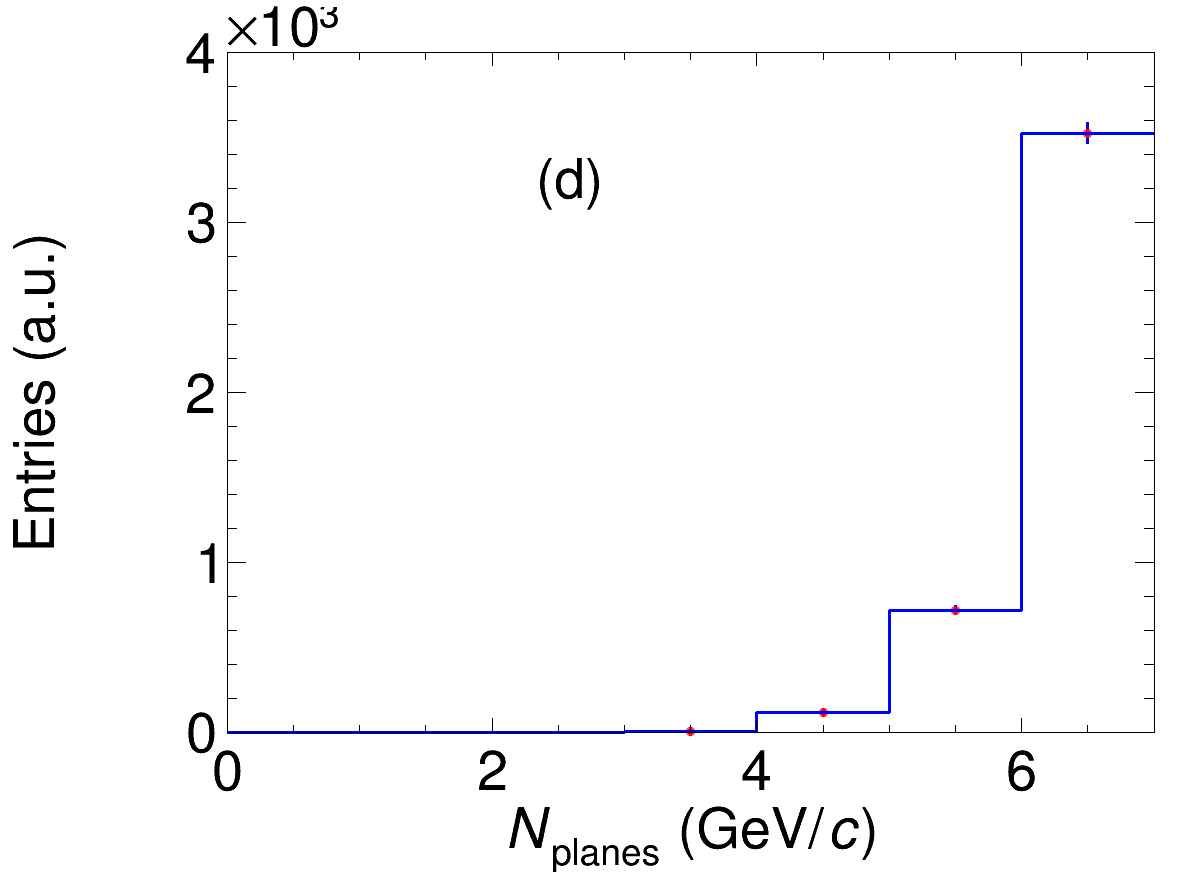

In [16]:
hq1 = ROOT.TCanvas("hq1","hq1",1200,900)
SetCanvas(hq1)
hq1.SetLeftMargin(0.19)
hq1.SetBottomMargin(0.16)
SetHisto(hNPlanes,";#it{N}_{planes} (GeV/#it{c});Entries (a.u.)",ROOT.kRed,20,[0,800*5])
hNPlanes.SetLineColor(ROOT.kBlue)
hNPlanes.GetXaxis().SetTitleSize(0.07)
hNPlanes.GetXaxis().SetTitleOffset(1.1)
hNPlanes.GetYaxis().SetTitleSize(0.07)
hNPlanes.GetYaxis().SetTitleOffset(1.4)
hNPlanes.GetXaxis().SetLabelSize(0.07)
hNPlanes.GetYaxis().SetLabelSize(0.07)
hNPlanes.Draw("E HIST")
legendchi2 = ROOT.TLegend(0.44,0.7,0.92,0.88)
SetLegend(legendchi2)
legendchi2.SetTextSize(0.05*0.68*2)
legendchi2.SetHeader("(d)")
legendchi2.Draw()
hq1.Draw()
hq1.Print(folder+"NPlanesAllTall.eps")

## Event Displays

Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/XY_view.eps has been created


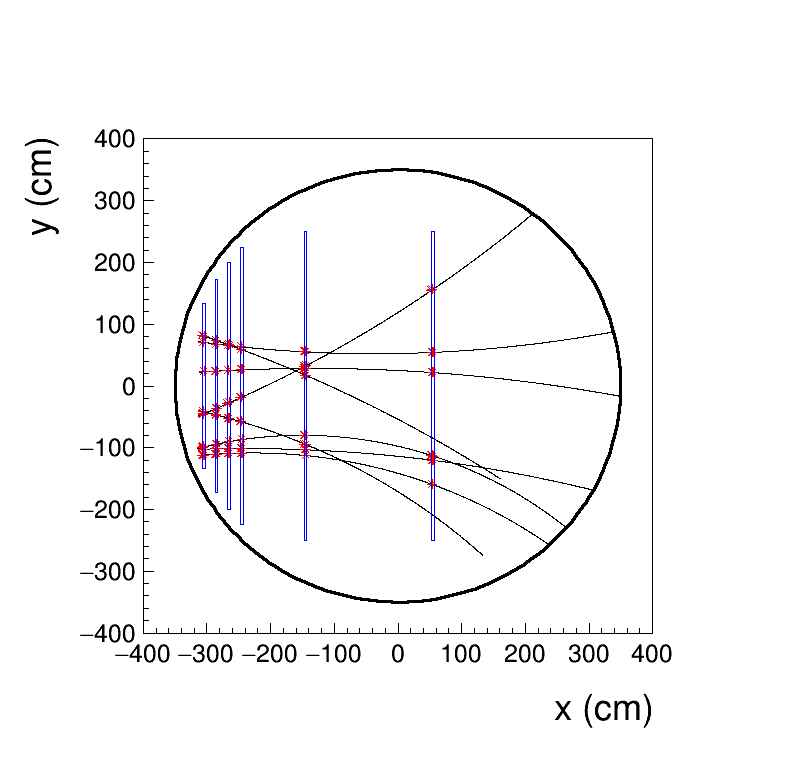

In [17]:
gStyle.SetOptStat(0)
n = t.Draw("xyz.fCoordinates.fY+150:xyz.fCoordinates.fZ-1486","","",8,0)
h = ROOT.TGraph(n,t.GetV2(),t.GetV1())
h.GetXaxis().SetLimits(-400,400)
h.GetYaxis().SetRangeUser(-400,400)

gStyle.SetOptStat(0)
n2 = t.Draw("xyz_plane.fCoordinates.fY+150:xyz_plane.fCoordinates.fZ-1486","","",8,0)
h2 = ROOT.TGraph(n2,t.GetV2(),t.GetV1())
h2.GetXaxis().SetLimits(-400,400)
h2.GetYaxis().SetRangeUser(-400,400)
h2.SetMarkerStyle(31)
h2.SetMarkerColor(ROOT.kRed)
h2.SetMarkerSize(1.2)

Planes_Y = [-283.5,-16.5,-322.5,22.5,-350,50,-375,75,-400,100,-400,100]
Planes_Z = [1179,1183,1199,1203,1219,1223,1239,1243,1339,1343,1539,1543]
m = ROOT.TMultiGraph()
m.Add(h)
m.Add(h2)
m.GetXaxis().SetLimits(-400,400)
m.GetXaxis().SetTitle("x (cm)")
m.GetYaxis().SetTitle("y (cm)")
m.GetYaxis().SetRangeUser(-400,400)
m.GetXaxis().SetLabelSize(0.035)
m.GetYaxis().SetLabelSize(0.035)
hq = ROOT.TCanvas("hq","hq",800,800)
m.Draw("AP")
hq.SetLeftMargin(0.12)
hq.SetRightMargin(0.12)
hq.SetTopMargin(0.12)
hq.SetBottomMargin(0.12)
el1 = ROOT.TEllipse(0,0,350,350)
el1.SetFillStyle(0)
el1.Draw("same")
el1.SetLineWidth(3)
p=[0,1,2,3,4,5]
c= 0
box0 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box0.SetFillStyle(0)
box0.SetLineWidth(1)
box0.SetLineColor(ROOT.kBlue)
box0.Draw("same")
c= 1
box1 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box1.SetFillStyle(0)
box1.SetLineWidth(1)
box1.SetLineColor(ROOT.kBlue)
box1.Draw("same")
c= 2
box2 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box2.SetFillStyle(0)
box2.SetLineWidth(1)
box2.SetLineColor(ROOT.kBlue)
box2.Draw("same")
c= 3
box3 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box3.SetFillStyle(0)
box3.SetLineWidth(1)
box3.SetLineColor(ROOT.kBlue)
box3.Draw("same")
c= 4
box4 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box4.SetFillStyle(0)
box4.SetLineWidth(1)
box4.SetLineColor(ROOT.kBlue)
box4.Draw("same")
c= 5
box5 = ROOT.TBox(Planes_Z[c*2]-1486,Planes_Y[c*2]+150,Planes_Z[c*2+1]-1486,Planes_Y[c*2+1]+150)
box5.SetFillStyle(0)
box5.SetLineWidth(1)
box5.Draw("same")
box5.SetLineColor(ROOT.kBlue)

gPad.SetLeftMargin(0.18)
gPad.SetRightMargin(0.18)
gPad.SetBottomMargin(0.18)
gPad.SetTopMargin(0.18)
hq.Draw()
hq.Print(folder+"XY_view.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq
Info in <TCanvas::Print>: eps file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx03y03_aliceseed_elossnocorr_MSnocorr_Helix_p_0.1_4/YZ_view.eps has been created


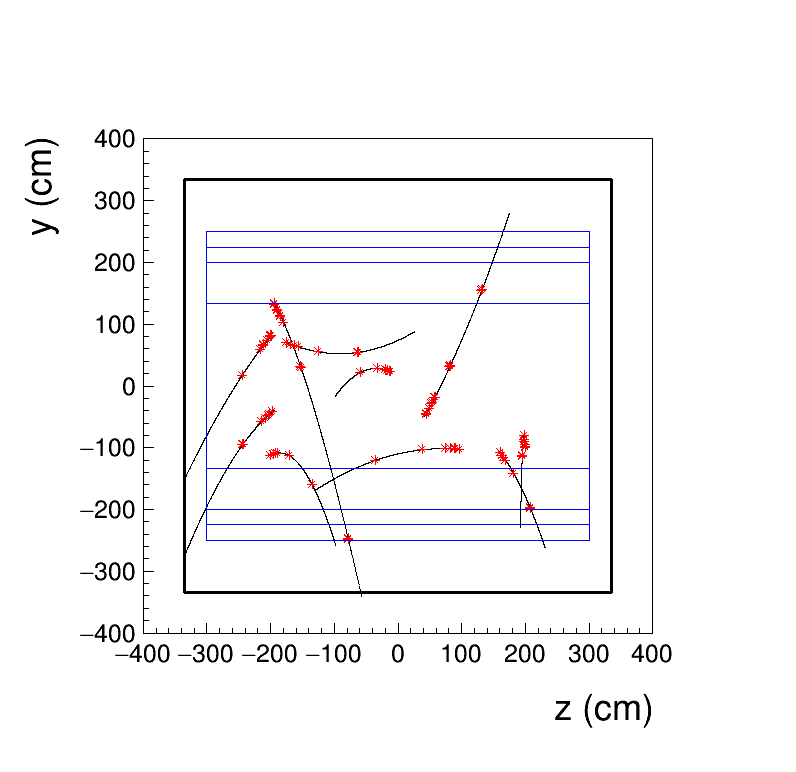

In [18]:
gStyle.SetOptStat(0)
n = t.Draw("xyz.fCoordinates.fY+150:xyz.fCoordinates.fX","","",10,0)
h = ROOT.TGraph(n,t.GetV2(),t.GetV1())
h.GetXaxis().SetLimits(-400,400)
h.GetYaxis().SetRangeUser(-400,400)
h.SetTitle(";x(cm);y(cm)")

gStyle.SetOptStat(0)
n2 = t.Draw("xyz_plane.fCoordinates.fY+150:xyz_plane.fCoordinates.fX","","",10,0)
h2 = ROOT.TGraph(n2,t.GetV2(),t.GetV1())
h2.GetXaxis().SetLimits(-400,400)
h2.GetYaxis().SetRangeUser(-400,400)
h2.SetMarkerStyle(31)
h2.SetMarkerColor(ROOT.kRed)
h2.SetMarkerSize(1.2)

Planes_Y = [-283.5,-16.5,-322.5,22.5,-350,50,-375,75,-400,100,-400,100]
Planes_Z = [-300,300,-300,300,-300,300,-300,300,-300,300,-300,300]
m = ROOT.TMultiGraph()
m.Add(h)
m.Add(h2)
m.GetXaxis().SetLimits(-400,400)
m.GetXaxis().SetTitle("z (cm)")
m.GetYaxis().SetTitle("y (cm)")
m.GetYaxis().SetRangeUser(-400,400)
m.GetXaxis().SetLabelSize(0.035)
m.GetYaxis().SetLabelSize(0.035)
hq = ROOT.TCanvas("hq","hq",800,800)
m.Draw("AP")
hq.SetLeftMargin(0.12)
hq.SetRightMargin(0.12)
hq.SetTopMargin(0.12)
hq.SetBottomMargin(0.12)
p=[0,1,2,3,4,5]
c= 0
box0 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box0.SetFillStyle(0)
box0.SetLineWidth(1)
box0.SetLineColor(ROOT.kBlue)
box0.Draw("same")
c= 1
box1 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box1.SetFillStyle(0)
box1.SetLineWidth(1)
box1.SetLineColor(ROOT.kBlue)
box1.Draw("same")
c= 2
box2 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box2.SetFillStyle(0)
box2.SetLineWidth(1)
box2.SetLineColor(ROOT.kBlue)
box2.Draw("same")
c= 3
box3 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box3.SetFillStyle(0)
box3.SetLineWidth(1)
box3.SetLineColor(ROOT.kBlue)
box3.Draw("same")
c= 4
box4 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box4.SetFillStyle(0)
box4.SetLineWidth(1)
box4.SetLineColor(ROOT.kBlue)
box4.Draw("same")
c= 5
box5 = ROOT.TBox(Planes_Z[c*2],Planes_Y[c*2]+150,Planes_Z[c*2+1],Planes_Y[c*2+1]+150)
box5.SetFillStyle(0)
box5.SetLineWidth(1)
box5.Draw("same")
box5.SetLineColor(ROOT.kBlue)

box1 = ROOT.TBox(-669.6/2,-669.6/2,669.6/2,669.6/2)
box1.SetFillStyle(0)
box1.SetLineWidth(3)
box1.Draw("same")

gPad.SetLeftMargin(0.18)
gPad.SetRightMargin(0.18)
gPad.SetBottomMargin(0.18)
gPad.SetTopMargin(0.18)
hq.Draw()
hq.Print(folder+"YZ_view.eps")